In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'])


In [56]:
data = pd.get_dummies(data, columns=['sex'])

In [57]:
X = data.drop(['rings'], axis=1)
y = data['rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [59]:
k = 5 # number of nearest neighbors to consider
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [60]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)


MSE: 5.047336523125997
RMSE: 2.246627811437844


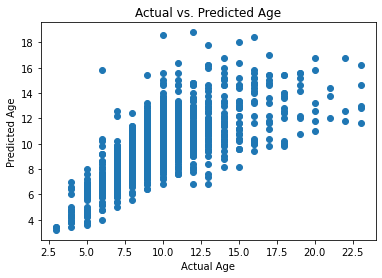

In [61]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs. Predicted Age')
plt.show()
